In [1]:
import numpy as np
import scipy
import scipy.spatial
import matplotlib.pyplot as plt
from math import sqrt, dist
import scipy.sparse as sp
import scipy.sparse.linalg as spln
from scipy.stats import multivariate_normal
print("Task 1")
arr_1 = [[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]

def task_1_1(arr):
    comp = 1
    for i in range(len(arr[0])):
        element = arr[i][i]
        if element:
            comp *= element
    return comp


def task_1_2(arr):
    dig = np.diag(arr)
    return np.prod(dig[dig != 0])


print("Python:", end=" ")
%timeit task_1_1(arr_1)
print("NumPy:", end=" ")
%timeit task_1_2(arr_1)





Task 1
Python: 806 ns ± 83.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
NumPy: 23 µs ± 3.76 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [2]:
print("Task 2")
arr_pth2 = [[9, 4, 2], [6, 0, 0], [9, 9, 3]]
i_1 = [1, 2, 1]
j_1 = [1, 0, 1]

arr_np2 = np.array(arr_pth2)
i_2 = np.array(i_1)
j_2 = np.array(j_1)


def task_2_1(arr, i, j):
    result_array = []
    for index in range(len(i)):
        result_array.append(arr[i[index]][j[index]])
    return result_array


def task_2_2(arr, i, j):
    return arr[i, j]


print("Python:", end=" ")
%timeit task_2_1(arr_pth2, i_1, j_1)
print("NumPy:", end=" ")
%timeit task_2_2(arr_np2, i_2, j_2)


Task 2
Python: 837 ns ± 84.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
NumPy: 3.84 µs ± 745 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [3]:
print("Task 3")
x_1 = [1, 2, 2, 4]
y_1 = [4, 2, 1, 2]

x_2 = np.array(x_1)
y_2 = np.array(y_1)


def task_3_1(arr1, arr2):
    return sorted(arr1) == sorted(arr2)


def task_3_2(arr1, arr2):
    return np.array_equal(np.bincount(arr1), np.bincount(arr2))


print("Python:", end=" ")
%timeit task_3_1(x_1, y_1)
print("NumPy:", end=" ")
%timeit task_3_2(x_2, x_2)

Task 3
Python: 702 ns ± 123 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
NumPy: 9.09 µs ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
print("Task 4")
x_pth = [6, 2, 0, 3, 0, 0, 5, 7, 0]
x_np = np.array(x_pth)


def task_4_pth(arr):
    counter = 0
    for i in range(1, len(arr)):
        if not arr[i-1]:
            continue
        new_element = arr[i]
        if new_element > counter:
            counter = new_element
    return counter


def task_4_np(arr):
    zero = arr == 0
    return arr[1:][zero[:-1]].max()


print("Python:", end=" ")
%timeit task_4_pth(x_pth)
print("NumPy:", end=" ")
%timeit task_4_np(x_np)

Task 4
Python: 1.09 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
NumPy: 5.51 µs ± 585 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Task 5


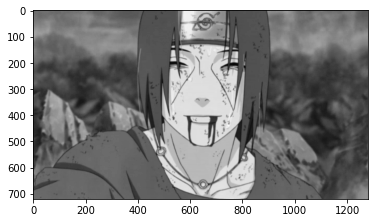

Python: 695 ms ± 125 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
NumPy: 39.5 ms ± 5.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
print("Task 5")
photo_arr_2 = plt.imread("D:\pythonlabs\lab7\image.png")
photo_arr_1 = photo_arr_2.tolist()
rgb_ration_1 = [0.298, 0.587, 0.114]
rgb_ration_2 = np.array(rgb_ration_1)


def task_5_1(arr, rgb_ration):
    result_array = []
    for height in arr:
        new_width = []
        for width in height:
            color = 0
            for i in range(3):
                color += width[i] * rgb_ration[i]
            new_width.append(color)
        result_array.append(new_width)
    return result_array


def task_5_2(arr, rgb_ration):
    return np.dot(arr[..., :3], rgb_ration)

arr_py = task_5_2(photo_arr_2, rgb_ration_2)
plt.imshow(arr_py, cmap='gray')
plt.show()


print("Python:", end=" ")
%timeit task_5_1(photo_arr_1, rgb_ration_1)
print("NumPy:", end=" ")
%timeit task_5_2(photo_arr_2, rgb_ration_2)

In [6]:
print("Task 6")
arr_1 = [2, 2, 2, 3, 3, 3, 5]
arr_2 = np.array(arr_1)


def task_6_1(arr):
    bin_arr = [0 for _ in range(max(arr)+1)]
    for item in arr:
        bin_arr[item] += 1

    arr1, arr2 = [], []
    for i in range(len(bin_arr)):
        element = bin_arr[i]
        if not element:
            continue
        arr1.append(i)
        arr2.append(element)
    return arr1, arr2


def task_6_2(arr):
    bin_count = np.bincount(arr)
    non_zero_indexes = np.nonzero(bin_count)[0]
    return non_zero_indexes, bin_count[non_zero_indexes]


print("Python:", end=" ")
%timeit task_6_1(arr_1)
print("NumPy:", end=" ")
%timeit task_6_2(arr_2)


Task 6
Python: 3.77 µs ± 527 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
NumPy: 3.83 µs ± 481 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
print("Task 7")
arr_x_pth = [2, 7, 6, 6, 9, 6, 3, 4, 9]
arr_y_pth = [1, 0, 0, 7, 2, 2, 4, 3, 0]

arr_x_np = np.array(arr_x_pth)
arr_y_np = np.array(arr_y_pth)


def task_7_np(arr_x, arr_y):
    return np.linalg.norm(arr_x - arr_y)


print("Python:", end=" ")
%timeit dist(arr_x_pth, arr_y_pth)
print("NumPy:", end=" ")
%timeit task_7_np(arr_x_np, arr_y_np)
print("Scipy:", end=" ")
%timeit scipy.spatial.distance.euclidean(arr_x_np, arr_y_np)

Task 7
Python: 311 ns ± 30.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
NumPy: 7.58 µs ± 881 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Scipy: 13.8 µs ± 1.89 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
print("Task 8")
sigma = np.array([
    [2.3, 0, 0, 0],
    [0, 1.5, 0, 0],
    [0, 0, 1.7, 0],
    [0, 0, 0, 2]
])

mu = np.array([2, 3, 8, 10])
x = np.array([2.1, 3.5, 8, 9.5])


def lognormpdf(x, mu, S):
    norm_ratio = len(S) * np.log(2*np.pi) + np.linalg.slogdet(S)[1]
    err = x - mu
    numerator = spln.spsolve(S, err).T.dot(err)
    return -0.5 * (norm_ratio + numerator)


print("NumPy:", end=" ")
%timeit lognormpdf(x, mu, sigma)
res1 = lognormpdf(x, mu, sigma)
print("Value NumPy =", res1)

print("Scipy:", end=" ")
%timeit multivariate_normal(mu, sigma).logpdf(x)
res2 = multivariate_normal(mu, sigma).logpdf(x)
print("Value Scipy =", res2)

Task 8
NumPy: 

d:\pythonlabs\lab7\venv\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


290 µs ± 45.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Value NumPy = -5.054836210528194
Scipy: 221 µs ± 45.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Value Scipy = -5.054836210528194
